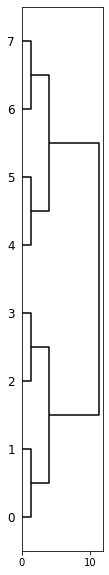

In [190]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Create data for clustering
X = [[1,2], [2,1], [3,4], [4,3], [5,6], [6,5], [7,8], [8,7]]

# Create linkage matrix using Ward's method
linkage_matrix = shc.linkage(X, method='ward')

# Plot the dendrogram in a circular layout
plt.figure(figsize=(10,10))
shc.dendrogram(linkage_matrix, orientation='right', distance_sort='ascending', color_threshold=0, above_threshold_color='black')
plt.gca().set_aspect('equal')
plt.show()


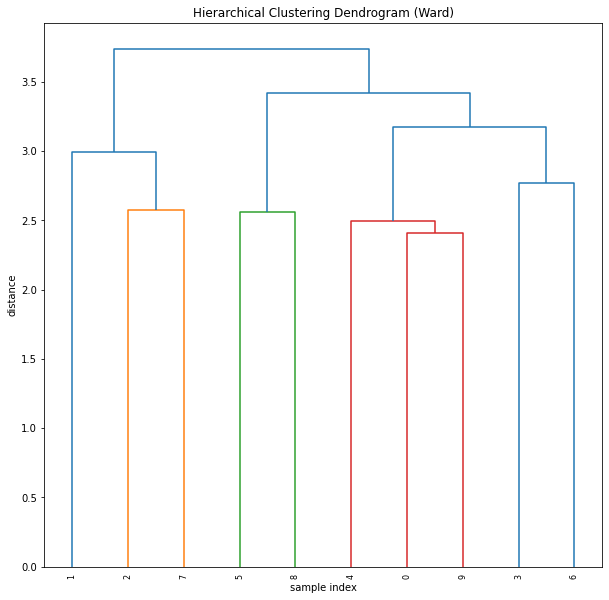

In [191]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
X = np.random.rand(10, 50)

# Compute the linkage matrix
Z = shc.linkage(X, method='ward')

# Create a circular dendrogram
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
shc.dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=np.arange(X.shape[0]), color_threshold=0.7*max(Z[:,2]))
plt.show()


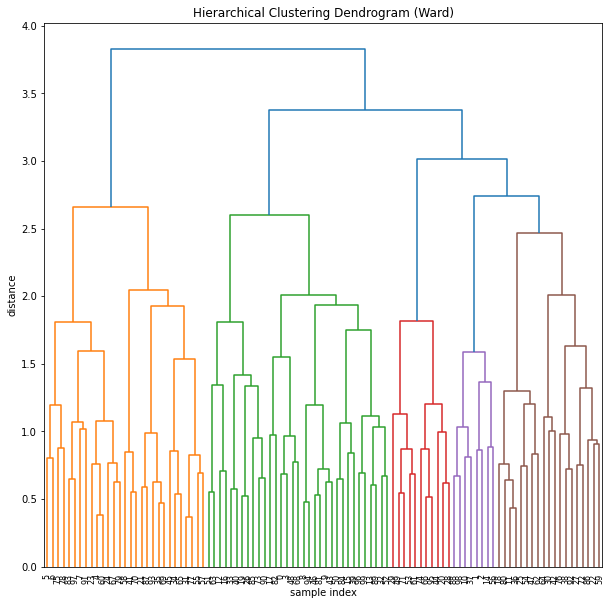

In [192]:
from matplotlib.pylab import savefig
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
X = np.random.rand(100, 10)

# Compute the linkage matrix
Z = shc.linkage(X, method='ward')

# Create a circular dendrogram
plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
tree=shc.dendrogram(Z, labels=np.arange(X.shape[0]), color_threshold=0.7*max(Z[:,2]), 
               leaf_rotation=90, leaf_font_size=8, orientation='top', 
               count_sort='ascending', distance_sort='ascending')

plt.savefig('tree.jpg')
plt.show()

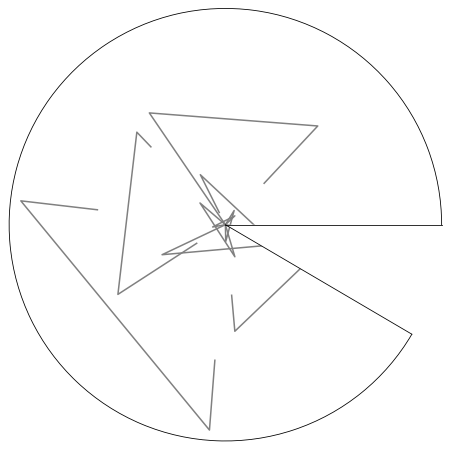

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# generate sample data
# X = [[1, 2], [3, 4], [5, 6], [7, 8]]
# generate sample data
np.random.seed(123)
X = np.random.randn(10, 2)

# perform hierarchical clustering
Z = linkage(X, method='ward')

# create polar axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# plot dendrogram in a polar layout
dendrogram(Z, ax=ax, color_threshold=0, above_threshold_color='gray')
ax.set_rticks([])
ax.set_thetagrids([])

plt.show()


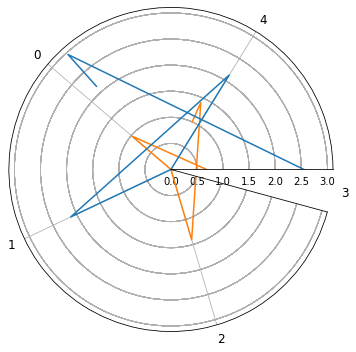

In [194]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)
X = np.random.randn(5, 2)

# Compute the linkage matrix
Z = linkage(X, 'ward')

# Plot the polar dendrogram with labels
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='polar')
# dendrogram(Z, labels=list('ABCDEFGHIJ'), ax=ax)
dendrogram(Z, labels=list(range(len(X))),ax=ax)
# dendrogram(Z,  ax=ax)
plt.show()



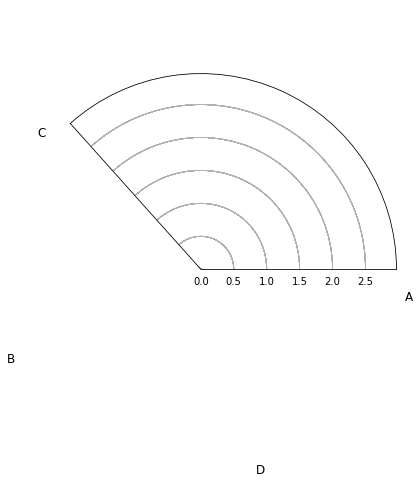

In [195]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Create a sample distance matrix
D = sch.distance.pdist([[1, 2], [3, 4], [5, 6], [7, 8]])

# Compute the hierarchical clustering
Z = sch.linkage(D, 'single')

# Create a polar dendrogram
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
sch.dendrogram(Z, labels=['A', 'B', 'C', 'D'], ax=ax)
plt.show()


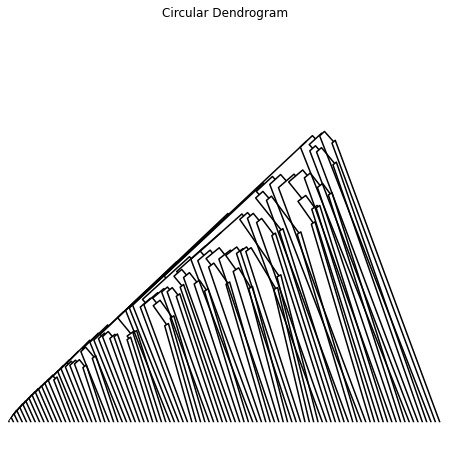

In [196]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
X = np.random.rand(100, 10)

# Compute linkage matrix
Z = linkage(X, 'single')

# Create a polar plot with 8 subplots
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Plot dendrogram with circular layout
dendrogram(Z, orientation='left', color_threshold=0, link_color_func=lambda k: 'black', ax=ax)

# Remove polar axes and set title
ax.set_axis_off()
ax.set_title('Circular Dendrogram')

plt.show()


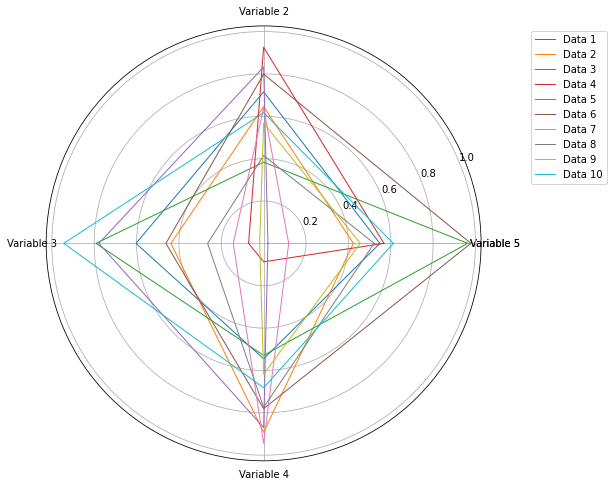

In [200]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
data = np.random.rand(10, 4)

# Create the star plot
angles = np.linspace(0, 2*np.pi, data.shape[1], endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
for i in range(data.shape[0]):
    values = np.concatenate((data[i], [data[i][0]]))
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Data {i+1}')
# ax.fill(angles, np.mean(data, axis=0), alpha=0.1)
ax.set_thetagrids(angles * 180/np.pi, labels=['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



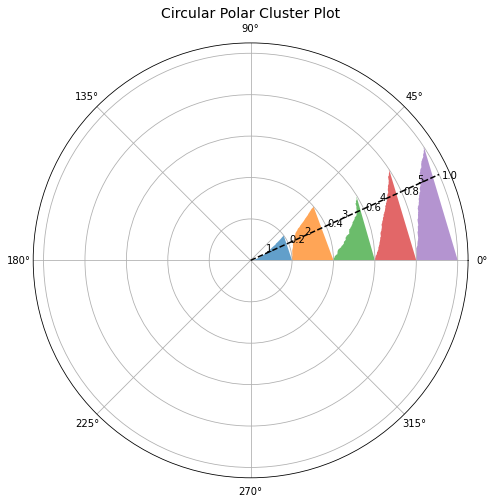

In [204]:
#polar cluster plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate a random data set
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)

# Fit KMeans clustering model to the data
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X, cluster_labels)
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Create a circular polar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Define angles for each cluster center
angles = np.linspace(0, 2*np.pi, len(np.unique(cluster_labels))+1)[:-1]

# Plot each cluster
for i, (angle, label) in enumerate(zip(angles, np.unique(cluster_labels))):
    # Get samples in the current cluster
    sample_vals = sample_silhouette_values[cluster_labels == label]
    # Sort samples by their silhouette score
    sorted_vals = np.sort(sample_vals)
    # Compute the bottom and top of the silhouette band for this cluster
    bottom = (i) / len(np.unique(cluster_labels))
    top = (i+1) / len(np.unique(cluster_labels))
    # Fill the silhouette band for this cluster
    ax.fill_betweenx(np.linspace(bottom, top, len(sorted_vals)),
                      0, sorted_vals, alpha=0.7)
    # Draw a vertical line at the average silhouette score for this cluster
    ax.plot([silhouette_avg, silhouette_avg], [bottom, top], 'k--')
    # Place a label at the bottom of the cluster's arc
    ax.text(silhouette_avg, (bottom+top)/2, str(i+1), ha='center')

# Set the title
plt.title('Circular Polar Cluster Plot', fontsize=14)

# Show the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



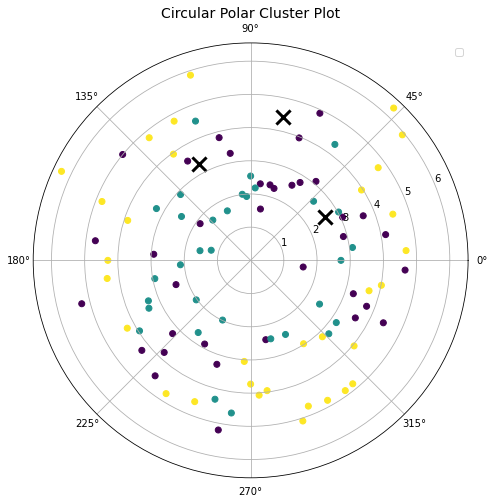

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a random data set
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a circular polar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Set the angles and radii for each data point
angles = np.linspace(0, 2*np.pi, len(X), endpoint=False)
radii = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

# Plot the data points with different colors for each cluster
ax.scatter(angles, radii, c=labels, cmap='viridis')

# Plot the centroids with a black X
centroid_angles = np.arctan2(centroids[:, 1], centroids[:, 0])
centroid_radii = np.sqrt(centroids[:, 0]**2 + centroids[:, 1]**2)
ax.scatter(centroid_angles, centroid_radii, marker='x', s=200, linewidths=3, color='black')

# Set the title
plt.title('Circular Polar Cluster Plot', fontsize=14)
plt.legend()
# Show the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



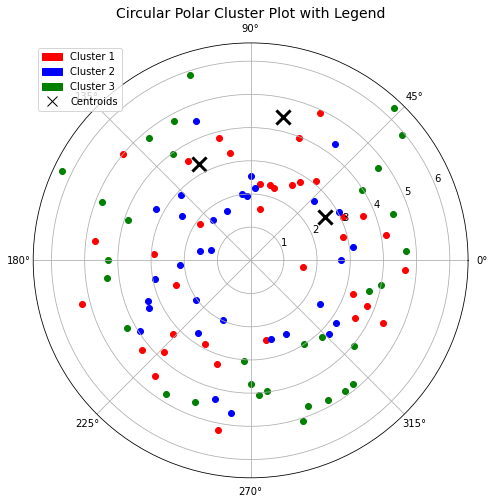

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a random data set
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a circular polar plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Set the angles and radii for each data point
angles = np.linspace(0, 2*np.pi, len(X), endpoint=False)
radii = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

# Define the colors for each cluster
colors = ['red', 'blue', 'green']

# Plot the data points with different colors for each cluster
for i in range(len(X)):
    ax.scatter(angles[i], radii[i], color=colors[labels[i]])

# Plot the centroids with a black X
centroid_angles = np.arctan2(centroids[:, 1], centroids[:, 0])
centroid_radii = np.sqrt(centroids[:, 0]**2 + centroids[:, 1]**2)
ax.scatter(centroid_angles, centroid_radii, marker='x', s=200, linewidths=3, color='black')

# Add a legend
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids']
scatter_proxy = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend_proxy = scatter_proxy + [plt.Line2D([0], [0], marker='x', color='black', linestyle='None', markersize=10)]
plt.legend(legend_proxy, legend_labels)

# Set the title
plt.title('Circular Polar Cluster Plot with Legend', fontsize=14)

# Show the plot
plt.show()
